<a href="https://colab.research.google.com/github/Amit2balag/Scaler-Projects/blob/main/Scaler_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement

Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv
To: /content/scaler_clustering.csv
100% 24.7M/24.7M [00:00<00:00, 87.0MB/s]


In [3]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv")
df.head(2)

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0


#Data Dictionary:

‘Unnamed 0’- Index of the dataset

Email_hash- Anonymised Personal Identifiable Information (PII)

Company_hash- Current employer of the learner

orgyear- Employment start date

CTC- Current CTC

Job_position- Job profile in the company

CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

In [4]:
pd.set_option("display.max_colwidth", -1)

<ipython-input-4-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [5]:
df['email_hash'].head(20)

0     6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af
1     b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b
2     4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059
3     effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7
4     6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095
5     18f2c4aa2ac9dd3ae8ff74f32d30413f5165565b90d8f21a44173a1f73fbb0f2
6     9bf128ae3f4ea26c7a38b9cdc58cf2acbb8592100c41288e867aac925d40a603
7     756d35a7f6bb8ffeaffc8fcca9ddbb78e7450fa0de2be0a5e9c8d98eb87f97f9
8     e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb019e8de1fdb83fc0d6
9     b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5e804e1dc27e305b06b
10    580f6368103ecb3c4f90245af63340e0b8a7a2dc946c1c12996001970de8be4d
11    72c2171a022115d475c8faac306912a4c95f6dd7fdd320df09a5e9160d2a8385
12    7f24d2f5171ea469482a9966832237bc023678883ecd0c5142677b75a138b2fa
13    134cc4a76a119493d523f1855a3b7106f64287455d5cd4bb14f4ad0659fe8a5f
14    

In [6]:
# df.drop(columns = ['email_hash'], inplace = True)
# df.head(5)

In [7]:
print(df['company_hash'].nunique(), df['job_position'].nunique())

37299 1017


In [8]:
df['company_hash'] = df['company_hash'].str.lower()
df['job_position'] = df['job_position'].str.lower()

In [9]:
print(df['company_hash'].nunique(), df['job_position'].nunique())

37299 944


In [10]:
df['YoE'] = df['ctc_updated_year'] - df['orgyear']  ##Year of Experience
df.drop(columns = ['orgyear', 'ctc_updated_year'], inplace = True)
df

,Unnamed: 0,company_hash,email_hash,ctc,job_position,YoE
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2000000,backend engineer,5.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,700000,backend engineer,2.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,1400000,fullstack engineer,2.0
...,...,...,...,...,...,...
205838,206918,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,220000,NaN,11.0
205839,206919,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,500000,NaN,3.0
205840,206920,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,700000,NaN,0.0
205841,206921,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,5100000,NaN,0.0


In [11]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df

,company_hash,email_hash,ctc,job_position,YoE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2000000,backend engineer,5.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,700000,backend engineer,2.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,1400000,fullstack engineer,2.0
...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,220000,NaN,11.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,500000,NaN,3.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,700000,NaN,0.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,5100000,NaN,0.0


In [12]:
df.isnull().sum()/len(df)*100

company_hash    0.021376 
email_hash      0.000000 
ctc             0.000000 
job_position    25.534995
YoE             0.041779 
dtype: float64

In [13]:
for ctc_value in df['ctc'].unique():
    try:
        mode_value = df[df['ctc'] == ctc_value]['company_hash'].mode().iloc[0]
        df.loc[df['ctc'] == ctc_value, 'company_hash'] = df.loc[df['ctc'] == ctc_value, 'company_hash'].fillna(mode_value)
    except IndexError:
        pass
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0


In [14]:
for ctc_value in df['ctc'].unique():
    try:
        mode_value = df[df['ctc'] == ctc_value]['job_position'].mode().iloc[0]
        # Fill missing values with the mode for the current 'ctc' value
        df.loc[df['ctc'] == ctc_value, 'job_position'] = df.loc[df['ctc'] == ctc_value, 'job_position'].fillna(mode_value)
    except IndexError:
        pass

df.head(2)

,company_hash,email_hash,ctc,job_position,YoE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0


In [15]:
df.isnull().sum()/len(df)*100

company_hash    0.000972
email_hash      0.000000
ctc             0.000000
job_position    0.113193
YoE             0.041779
dtype: float64

In [16]:
df.dropna(axis = 0, inplace=True)
df

,company_hash,email_hash,ctc,job_position,YoE
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2000000,backend engineer,5.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,700000,backend engineer,2.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,1400000,fullstack engineer,2.0
...,...,...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,220000,other,11.0
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,500000,backend engineer,3.0
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,700000,backend engineer,0.0
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,5100000,backend engineer,0.0


In [17]:
df.isnull().sum()/len(df)*100

company_hash    0.0
email_hash      0.0
ctc             0.0
job_position    0.0
YoE             0.0
dtype: float64

In [18]:
import pandas as pd
ctc_mean_by_company = df.groupby('company_hash')['ctc'].mean()
df = df.merge(ctc_mean_by_company, how='left', on='company_hash', suffixes=('', '_mean'))
percentile_50 = df['ctc_mean'].quantile(0.5)
percentile_75 = df['ctc_mean'].quantile(0.75)
df['Company_ctc_label'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50, percentile_75, float('inf')],
                    labels=[1, 2, 3])
df = df.drop(columns=['ctc_mean'])
df

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2000000,backend engineer,5.0,2
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,700000,backend engineer,2.0,2
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,1400000,fullstack engineer,2.0,1
...,...,...,...,...,...,...
205517,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,220000,other,11.0,2
205518,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,500000,backend engineer,3.0,2
205519,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,700000,backend engineer,0.0,1
205520,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c819ec41f6af222a8699,5100000,backend engineer,0.0,3


In [19]:
job_position_mean = df.groupby('job_position')['ctc'].mean()
df = df.merge(job_position_mean, how='left', on='job_position', suffixes=('', '_mean'))
percentile_50_job = df['ctc_mean'].quantile(0.5)
percentile_75_job = df['ctc_mean'].quantile(0.75)
df['Job_ctc_label'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50_job, percentile_75_job, float('inf')],
                    labels=[1, 2, 3])
df = df.drop(columns=['ctc_mean'])
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2


In [20]:
company_hash_job_position_mean = df.groupby(['job_position', 'company_hash'])['ctc'].mean().reset_index()

df = df.merge(company_hash_job_position_mean, how='left', on=['job_position', 'company_hash'], suffixes=('', '_mean'))

percentile_50_job = df['ctc_mean'].quantile(0.5)
percentile_75_job = df['ctc_mean'].quantile(0.75)

df['company_hash_job_position_label'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50_job, percentile_75_job, float('inf')],
                    labels=[1, 2, 3])
df = df.drop(columns=['ctc_mean'])

df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1


In [21]:
job_position_mean = df.groupby('YoE')['ctc'].mean()
df = df.merge(job_position_mean, how='left', on='YoE', suffixes=('', '_mean'))

percentile_50_job = df['ctc_mean'].quantile(0.5)
percentile_75_job = df['ctc_mean'].quantile(0.75)

df['YoE_ctc_label'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50_job, percentile_75_job, float('inf')],
                    labels=[1, 2, 3])

df = df.drop(columns=['ctc_mean'])
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label,YoE_ctc_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1,1


In [22]:
YoE_job_position_mean = df.groupby(['job_position', 'YoE'])['ctc'].mean().reset_index()
df = df.merge(YoE_job_position_mean, how='left', on=['job_position', 'YoE'], suffixes=('', '_mean'))

percentile_50_job = df['ctc_mean'].quantile(0.5)
percentile_75_job = df['ctc_mean'].quantile(0.75)

df['YoE_job_position_label'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50_job, percentile_75_job, float('inf')],
                    labels=[1, 2, 3])
df = df.drop(columns=['ctc_mean'])
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label,YoE_ctc_label,YoE_job_position_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1,1,3
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1,1,1


In [23]:
YoE_company_hash_mean = df.groupby(['company_hash', 'YoE'])['ctc'].mean().reset_index()
df = df.merge(YoE_company_hash_mean, how='left', on=['company_hash', 'YoE'], suffixes=('', '_mean'))
percentile_50_job = df['ctc_mean'].quantile(0.5)
percentile_75_job = df['ctc_mean'].quantile(0.75)

df['YoE_company_hash_label'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50_job, percentile_75_job, float('inf')],
                    labels=[1, 2, 3])
df = df.drop(columns=['ctc_mean'])
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label,YoE_ctc_label,YoE_job_position_label,YoE_company_hash_label
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1,1,3,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1,1,1,3


In [24]:
YoE_company_hash_job_position_mean = df.groupby(['company_hash', 'YoE', 'job_position'])['ctc'].mean().reset_index()
df = df.merge(YoE_company_hash_job_position_mean, how='left', on=['company_hash', 'YoE', 'job_position'], suffixes=('', '_mean'))
percentile_50_job = df['ctc_mean'].quantile(0.5)
percentile_75_job = df['ctc_mean'].quantile(0.75)
df['YoE_company_hash_job_position'] = pd.cut(df['ctc_mean'],
                    bins=[float('-inf'), percentile_50_job, percentile_75_job, float('inf')],
                    labels=[1, 2, 3])
df = df.drop(columns=['ctc_mean'])
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label,YoE_ctc_label,YoE_job_position_label,YoE_company_hash_label,YoE_company_hash_job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1,1,3,1,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1,1,1,3,1


In [25]:
df.dtypes

company_hash                       object  
email_hash                         object  
ctc                                int64   
job_position                       object  
YoE                                float64 
Company_ctc_label                  category
Job_ctc_label                      category
company_hash_job_position_label    category
YoE_ctc_label                      category
YoE_job_position_label             category
YoE_company_hash_label             category
YoE_company_hash_job_position      category
dtype: object

In [26]:
df['Company_ctc_label'] = df['Company_ctc_label'].astype(int)
df['Job_ctc_label'] = df['Job_ctc_label'].astype(int)
df['company_hash_job_position_label'] = df['company_hash_job_position_label'].astype(int)
df['YoE_ctc_label'] = df['YoE_ctc_label'].astype(int)
df['YoE_job_position_label'] = df['YoE_job_position_label'].astype(int)
df['YoE_company_hash_label'] = df['YoE_company_hash_label'].astype(int)
df['YoE_company_hash_job_position'] = df['YoE_company_hash_job_position'].astype(int)
df.dtypes

company_hash                       object 
email_hash                         object 
ctc                                int64  
job_position                       object 
YoE                                float64
Company_ctc_label                  int64  
Job_ctc_label                      int64  
company_hash_job_position_label    int64  
YoE_ctc_label                      int64  
YoE_job_position_label             int64  
YoE_company_hash_label             int64  
YoE_company_hash_job_position      int64  
dtype: object

In [27]:
df.head(2)

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label,YoE_ctc_label,YoE_job_position_label,YoE_company_hash_label,YoE_company_hash_job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1,1,3,1,1
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1,1,1,3,1


In [28]:
print('Shape before outlier removal', ':', df.shape)
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

    return data_filtered

df_no_outliers = remove_outliers_iqr(df, 'ctc')
df = df_no_outliers

print('Shape before outlier removal', ':', df.shape)

Shape before outlier removal : (205522, 12)
Shape before outlier removal : (192488, 12)


#Clustering Model Development & Hyperparameter Finetuning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

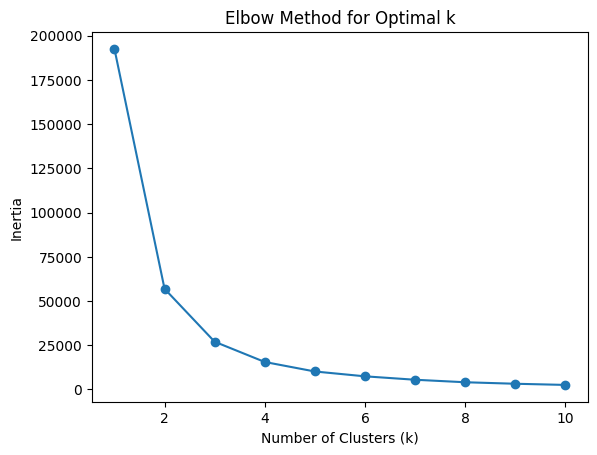

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Best Parameters: {'init': 'k-means++', 'max_iter': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


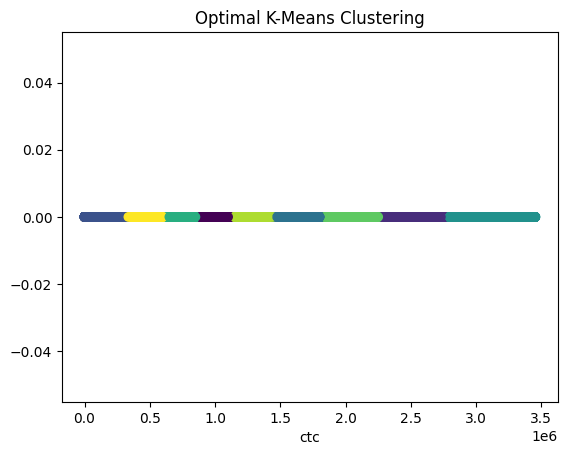

,company_hash,email_hash,ctc,job_position,YoE,Company_ctc_label,Job_ctc_label,company_hash_job_position_label,YoE_ctc_label,YoE_job_position_label,YoE_company_hash_label,YoE_company_hash_job_position,cluster
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c050c0618caea697c87af,1100000,other,4.0,1,3,1,1,3,1,1,0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c100a9661a92bdcc0407b,449999,fullstack engineer,1.0,2,2,1,1,1,3,1,8
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e90fd66c9df6b37b9059,2000000,backend engineer,5.0,2,1,2,2,1,2,3,6
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58a44274d5d6876dfec7,700000,backend engineer,2.0,2,1,2,1,1,1,2,5
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520214b31b95211adb095,1400000,fullstack engineer,2.0,1,2,1,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205516,zgn vuurxwvmrt,fe34477c3f64e6ed4301417c8fb9d5e2608722a10f1f4e5cf7872038bbb98b31,800000,backend engineer,0.0,3,1,2,1,1,3,2,5
205517,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b6e8d7cb06af04e0c05,220000,other,11.0,2,3,1,3,3,1,1,2
205518,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b4264c8e881b4a61cdb53,500000,backend engineer,3.0,2,1,2,1,1,1,2,8
205519,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c8852b58da2fde5e00c,700000,backend engineer,0.0,1,1,2,1,1,1,1,5


In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'ctc' is the column you want to use for clustering
# Replace 'ctc' with the actual column name in your DataFrame

# Select the feature(s) for clustering
X = df[['ctc']]

# Standardize the feature(s) to have zero mean and unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to find the optimal number of clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

optimal_k = 9  # have a look into the elbo diagram for better ubderstanding

# Hyperparameter tuning using Grid Search
param_grid = {
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
}

# Create a k-means instance
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_scaled)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Apply k-means clustering with optimal hyperparameters
kmeans_optimal = KMeans(n_clusters=optimal_k, **grid_search.best_params_, random_state=42)
df['cluster'] = kmeans_optimal.fit_predict(X_scaled)

# Visualize the clusters
plt.scatter(df['ctc'], [0] * len(df), c=df['cluster'], cmap='viridis')
plt.title('Optimal K-Means Clustering')
plt.xlabel('ctc')
plt.show()

df